# Thompson Sampling vs Intuition

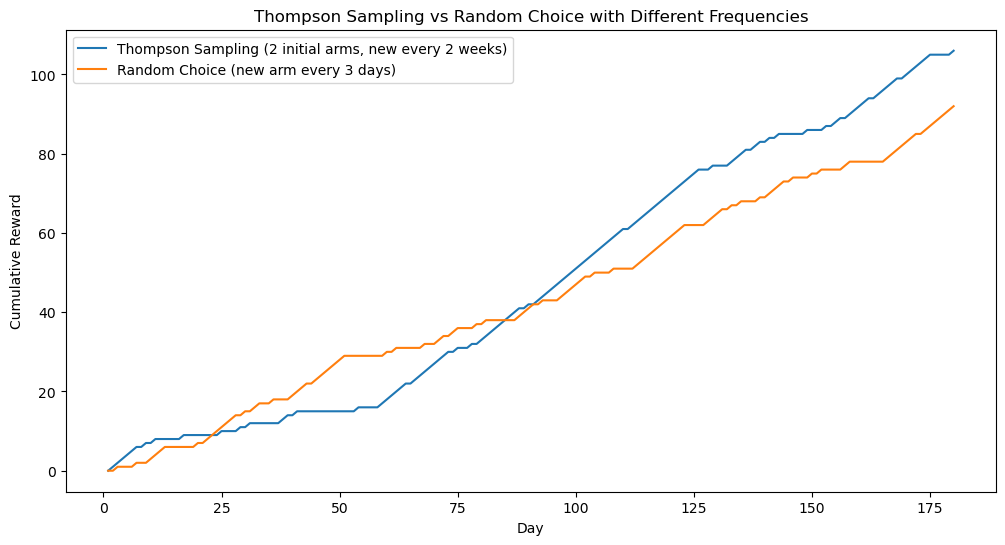

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Number of trials and intervals for each strategy
n_weeks = 26  # 6 months approximately
n_days = 180  # 6 months approximately
experiment_interval = 14  # days for Thompson sampling (2 weeks)
update_interval = 3  # days for Random choice

# Function to simulate conversions for each arm
def simulate_conversion(prob):
    return 1 if np.random.rand() < prob else 0

# Thompson Sampling with Two-Week Cycle
def thompson_sampling_two_week_cycle(n_initial_arms, n_weeks, experiment_interval, true_conversion_rates):
    n_arms = n_initial_arms + (n_weeks // (experiment_interval // 7))  # total arms after adding a new one every 2 weeks
    successes = np.zeros(n_arms)
    failures = np.zeros(n_arms)
    rewards = np.zeros(n_weeks * experiment_interval)

    for t in range(0, n_weeks * experiment_interval, experiment_interval):
        available_arms = min(n_initial_arms + t // experiment_interval + 1, n_arms)
        arm1, arm2 = np.random.choice(available_arms, 2, replace=False)
        theta1 = np.random.beta(successes[arm1] + 1, failures[arm1] + 1)
        theta2 = np.random.beta(successes[arm2] + 1, failures[arm2] + 1)
        
        chosen_arm = arm1 if theta1 > theta2 else arm2
        for i in range(t, t + experiment_interval):
            reward = simulate_conversion(true_conversion_rates[chosen_arm])
            rewards[i] = reward
            
            if reward == 1:
                successes[chosen_arm] += 1
            else:
                failures[chosen_arm] += 1

    return np.cumsum(rewards)

# Random Choice with Three-Day Cycle
def random_choice_three_day_cycle(n_arms, n_days, update_interval, true_conversion_rates):
    rewards = np.zeros(n_days)

    for t in range(0, n_days, update_interval):
        chosen_arm = np.random.randint(n_arms)
        for i in range(t, min(t + update_interval, n_days)):
            reward = simulate_conversion(true_conversion_rates[chosen_arm])
            rewards[i] = reward

    return np.cumsum(rewards)

# Simulated true conversion probabilities for each arm
true_conversion_rates_thompson = np.random.rand(15)  # 2 initial arms + 13 new ones over 6 months
true_conversion_rates_random = np.random.rand(60)  # 60 arms, one for each random iteration

# Run simulations
rewards_thompson = thompson_sampling_two_week_cycle(2, n_weeks, experiment_interval, true_conversion_rates_thompson)
rewards_random = random_choice_three_day_cycle(60, n_days, update_interval, true_conversion_rates_random)

# Plot results with time (days) on the x-axis
days = np.arange(1, n_days + 1)

plt.figure(figsize=(12, 6))
plt.plot(days, rewards_thompson[:n_days], label='Thompson Sampling (2 initial arms, new every 2 weeks)')
plt.plot(days, rewards_random, label='Random Choice (new arm every 3 days)')
plt.xlabel('Day')
plt.ylabel('Cumulative Reward')
plt.legend()
plt.title('Thompson Sampling vs Random Choice with Different Frequencies')
plt.show()